In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime

import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
# mpl.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.size'] = 16

# Try granger causality

In [ ]:
# df = pd.read_csv("aggregated_individual_data/0_aggregated.csv", index_col=0, header=0, parse_dates=["date"])
# df["date"] = df["date"]
# df= df.iloc[27:-1]
# df['days'] = (df['date'] - df['date'].min()).dt.days.astype(int)
# df.drop(["date","weekday", 'appCat.weather', 'appCat.office', 'appCat.game'], axis=1,inplace=True)
# # df.drop("Unnamed: 0", axis=1, inplace=True)
# df = df.loc[:, (df != 0).any(axis=0)]
# df

In [ ]:
# def granger_causality_matrix(data, variables, test="ssr_chi2test", verbose=False, maxlag=7):
#     df = pd.DataFrame(np.zeros((len(variables),len(variables))), columns=variables, index=variables)
#     for c in df.columns:
#         for r in df.index:
#             test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
#             p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
#             if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
#             min_p_value = np.min(p_values)
#             df.loc[r, c] = min_p_value
#     df.columns = [var + '_x' for var in variables]
#     df.index = [var + '_y' for var in variables]
#     return df

In [ ]:
# # Use your granger_causality_matrix function on the days column
# variables = ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities']
# granger_matrix = granger_causality_matrix(df[['days'] + list(df.columns)], list(df.columns), maxlag=4)
# granger_matrix

In [ ]:
# plt.figure(figsize=(12,12))
# sns.heatmap(granger_matrix, cmap="Spectral_r")
# plt.show()

------

In [ ]:
import granger as gr

In [19]:
df1 = pd.read_csv(f"aggregated_individual_data/{0}_aggregated.csv", index_col=0,parse_dates=["date"])
df1['days'] = (df1['date'] - df1['date'].min()).dt.days.astype(int)
for i in range(1,27):
    df2 = pd.read_csv(f"aggregated_individual_data/{0}_aggregated.csv", index_col=0,parse_dates=["date"])

    df2['days'] = (df2['date'] - df2['date'].min()).dt.days.astype(int)
    # df1 = pd.concat([df1,df2], axis=0, ignore_index=True)
    df1 += df2
df1

,date,weekday,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,mood_std,circumplex.arousal_std,circumplex.valence_std,activity_std,days
0,2014-03-21,4,6.20,0.2,0.20,0.134050,17978.907000,6.0,0.0,3139.218,...,4508.500,915.445,0.000,598.754,0.000,0.0,0.0,0.0,0.221478,0
1,2014-03-22,5,6.40,0.6,0.50,0.236880,6142.161000,3.0,1.0,731.429,...,439.632,37.305,0.000,117.621,0.000,0.0,0.0,0.0,0.166143,1
2,2014-03-23,6,6.80,0.2,0.80,0.142741,6773.832001,0.0,0.0,1286.246,...,900.839,0.000,0.000,30.086,30.386,0.0,0.0,0.0,0.114999,2
3,2014-03-24,0,6.00,0.8,0.00,0.078961,15047.351001,10.0,0.0,866.956,...,3223.626,419.805,0.000,178.732,0.000,0.0,0.0,0.0,0.104793,3
4,2014-03-25,1,6.75,0.5,0.50,0.098374,21475.354999,0.0,1.0,1032.768,...,1919.471,0.000,235.223,222.893,0.000,0.0,0.0,0.0,0.147112,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,2014-04-30,2,7.80,-0.4,0.75,0.151051,9175.604999,1.0,0.0,844.963,...,89.166,272.798,0.000,112.295,0.000,0.0,0.0,0.0,0.182664,40
1211,2014-05-01,3,8.00,-0.4,1.00,0.037065,15516.951998,7.0,4.0,1876.113,...,4918.942,0.000,0.000,269.569,0.000,0.0,0.0,0.0,0.037171,41
1212,2014-05-02,4,7.60,-0.2,1.00,0.077341,15088.519001,0.0,0.0,795.436,...,771.266,0.000,0.000,11.083,0.000,0.0,0.0,0.0,0.105937,42
1213,2014-05-03,5,8.00,-0.2,1.00,0.071741,8186.036001,0.0,1.0,753.257,...,205.602,143.631,30.102,125.605,0.000,0.0,0.0,0.0,0.097756,43


In [20]:
# df1 = df1.apply(lambda x: x if pd.api.types.is_numeric_dtype(x) else x)
df1.drop(["date","weekday", "mood_std","circumplex.valence_std","circumplex.arousal_std", "activity_std", "appCat.weather"], axis=1,inplace=True)
df1.columns

Index(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'days'],
      dtype='object')

In [29]:
def granger_causality_matrix(data, variables, test="ssr_chi2test", verbose=False, maxlag=12):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i + 1][0][test][1], 4) for i in range(maxlag)]
            # if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df



                        mood_x  circumplex.arousal_x  circumplex.valence_x  \
mood_y                  1.0000                0.0077                0.0000   
circumplex.arousal_y    0.0000                1.0000                0.0000   
circumplex.valence_y    0.0006                0.0000                1.0000   
activity_y              0.0000                0.4057                0.0000   
screen_y                0.2796                0.0009                0.0000   
call_y                  0.0049                0.0064                0.0004   
sms_y                   0.0002                0.0041                0.9407   
appCat.builtin_y        0.0000                0.0000                0.0000   
appCat.communication_y  0.2186                0.0000                0.0004   
appCat.entertainment_y  0.0000                0.0000                0.0000   
appCat.finance_y        0.0000                0.0677                0.0005   
appCat.game_y           0.0006                0.1214            

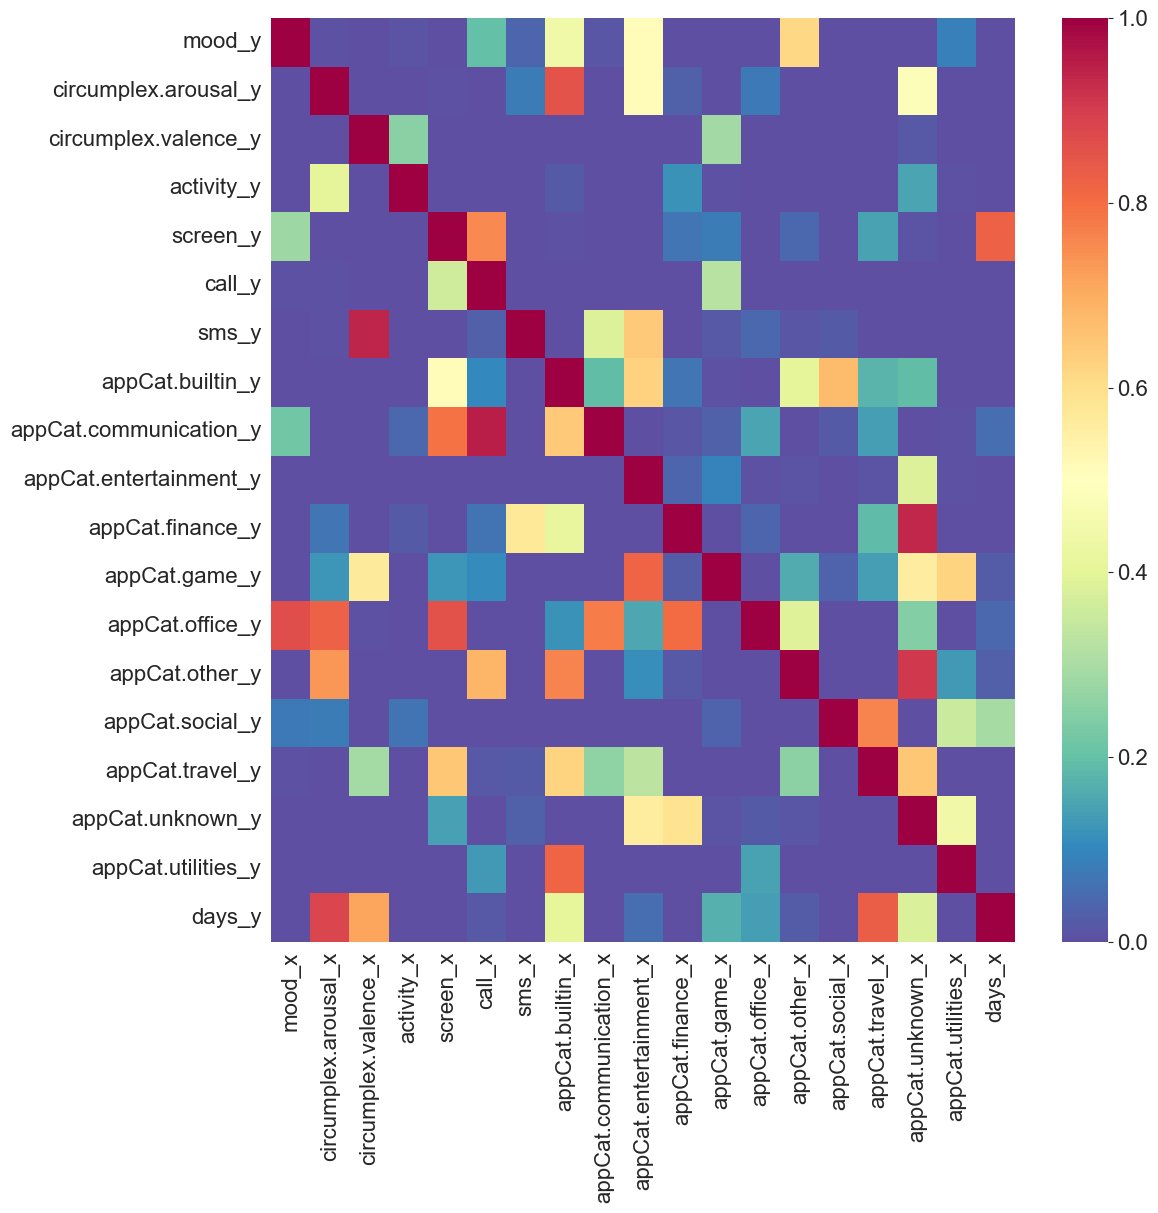

In [35]:
granger_matrix = granger_causality_matrix(df1, list(df1.columns), maxlag=1)
print(granger_matrix)
plt.figure(figsize=(12,12))
sns.heatmap(granger_matrix, cmap="Spectral_r")
plt.show()